In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [32]:
df=pd.read_csv('train_set_diabetes.csv',index_col=0)
df2=pd.read_csv('Cleaned_Diabetes.csv',index_col=0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,High_BloodPressure,Weight,Elderly,Glucose_Level,Thickness_level
118,4,97,60,23,125.0,28.2,0.443,22,0,0,Healthy,0,normal_glucose_levels,3
336,0,117,72,32,125.0,33.8,0.932,44,0,0,Obese,0,normal_glucose_levels,4
374,2,122,52,43,158.0,36.2,0.816,28,0,0,Obese,0,normal_glucose_levels,5
518,13,76,60,32,125.0,32.8,0.180,41,0,0,Obese,0,normal_glucose_levels,4
716,3,173,78,39,185.0,33.8,0.970,31,1,0,Obese,0,high_glucose_levels,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,3,182,74,32,125.0,30.5,0.345,29,1,0,Obese,0,high_glucose_levels,4
143,10,108,66,32,125.0,32.4,0.272,42,1,0,Obese,0,normal_glucose_levels,4
474,4,114,64,32,125.0,28.9,0.126,24,0,0,Healthy,0,normal_glucose_levels,4
318,3,115,66,39,140.0,38.1,0.150,28,0,0,Obese,0,normal_glucose_levels,4


In [33]:
df['Outcome'].isnull().value_counts()

False    614
Name: Outcome, dtype: int64

In [34]:
df_true=df[df['Outcome']==1]
df_false=df[df['Outcome']==0]
df_true

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,High_BloodPressure,Weight,Elderly,Glucose_Level,Thickness_level
716,3,173,78,39,185.0,33.8,0.970,31,1,0,Obese,0,high_glucose_levels,4
370,3,173,82,48,465.0,38.4,2.137,25,1,1,Obese,0,high_glucose_levels,5
9,8,125,96,32,125.0,32.3,0.232,54,1,1,Obese,0,normal_glucose_levels,4
215,12,151,70,40,271.0,41.8,0.742,38,1,0,Obese,0,high_glucose_levels,4
111,8,155,62,26,495.0,34.0,0.543,46,1,0,Obese,0,high_glucose_levels,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,15,136,70,32,110.0,37.1,0.153,43,1,0,Obese,0,high_glucose_levels,4
255,1,113,64,35,125.0,33.6,0.543,21,1,0,Obese,0,normal_glucose_levels,4
317,3,182,74,32,125.0,30.5,0.345,29,1,0,Obese,0,high_glucose_levels,4
143,10,108,66,32,125.0,32.4,0.272,42,1,0,Obese,0,normal_glucose_levels,4


<AxesSubplot:>

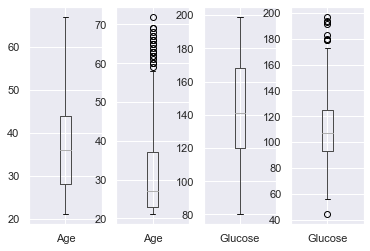

In [35]:
#as we can see most of the diabetics are between age 28-43
#and most of the false are younger people ,you can see this by the outliers
fig, axes = plt.subplots(nrows=1, ncols=4) 


df_true.boxplot(column=['Age'],ax=axes[0])
df_false.boxplot(column=['Age'],ax=axes[1])
df_true.boxplot(column=['Glucose'],ax=axes[2])
df_false.boxplot(column=['Glucose'],ax=axes[3])


<AxesSubplot:>

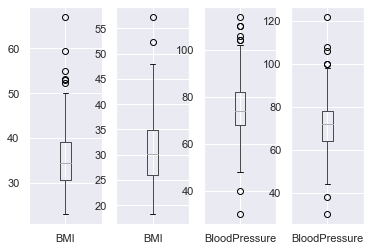

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=4) 

df_true.boxplot(column=['BMI'],ax=axes[0])
df_false.boxplot(column=['BMI'],ax=axes[1])
df_true.boxplot(column=['BloodPressure'],ax=axes[2])
df_false.boxplot(column=['BloodPressure'],ax=axes[3])

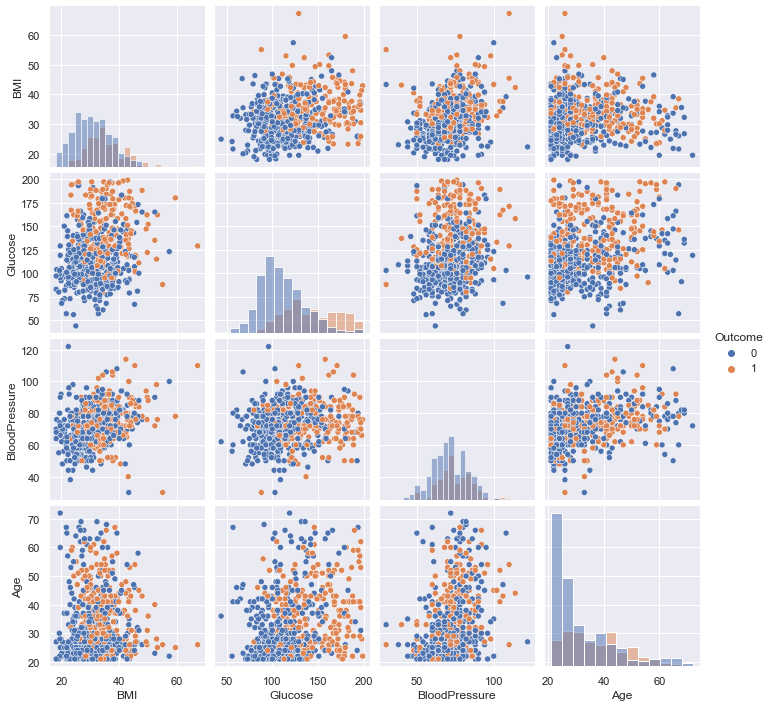

In [37]:
sns.pairplot(df[['Outcome','BMI','Glucose','BloodPressure','Age']],hue='Outcome', diag_kind="hist")

Text(0.5, 1.0, 'Elderly:')

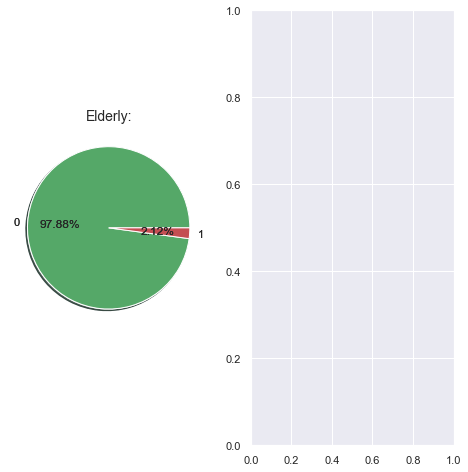

In [38]:
#as we can see making this column wasnt so helpful
fig, ax = plt.subplots(1,2, figsize = (8,8))
(ax1, ax2) = ax

labels = df['Elderly'].value_counts().index.tolist()
values = df['Elderly'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("Elderly:", fontdict={'fontsize': 14})

labels = df['Elderly'].value_counts().index.tolist()
values = df['Elderly'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("Elderly:", fontdict={'fontsize': 14})

Some visualization ideas: create another "dataframe" with just those who have an outcome 1 for diabetes
Then, look at graphs to check the disribution of Ages, BMI, Insulin, Blood Pressure, Glucose, Diabetes Degree Function (what is that?), Skin Thickness and Pregnancies. I think that a scatter plot would do best.

Now take another dataframe with just the people who do NOT have diabetes
Check the distribution of Insulin, Blood Pressure, Diabetes Degree Function (what is that?), Glucose, Skin Thickness. 

Why? The first graphs may give you another way to see how the data is skewed. For example, it might show that there are certain BMI's more likely to have diabetes (more concentration in higher BMI). 
The second graphs may reveal some thresholds. For example, you may find that there is a maximum 'blood pressure', and anyone above that has diabetes "for sure". 

Another thing that can be done other than scatterplots for these is also boxplots. Then you can really see the min/max for these values and the outliers. 


More things: explain perhaps the low correlation rates of some of these seemingly helpful features through the use of pie charts; for example, showing that there are only 16 elderly from the whole data frame. 
Something else you can do with that one is show the difference between the percentage of elderly with diabetes versus the percentage of the rest of the dataframe with diabetes. You can try that with other things that have less correlation but appear relevant.

Bar graph comparison of the different 'skin thickness' categories and the number of people with diabetes versus without diabetes

Bar graph comparison of the different 'glucose' categories and the number of people with diabetes versus without diabetes

Same thing with categories of weight

Check a graph for glucose categories versus average insulin levels. might be telling.

correlation heatmap for these dummies: weight vs glucose levels



In [39]:
# lets try to find some correlations

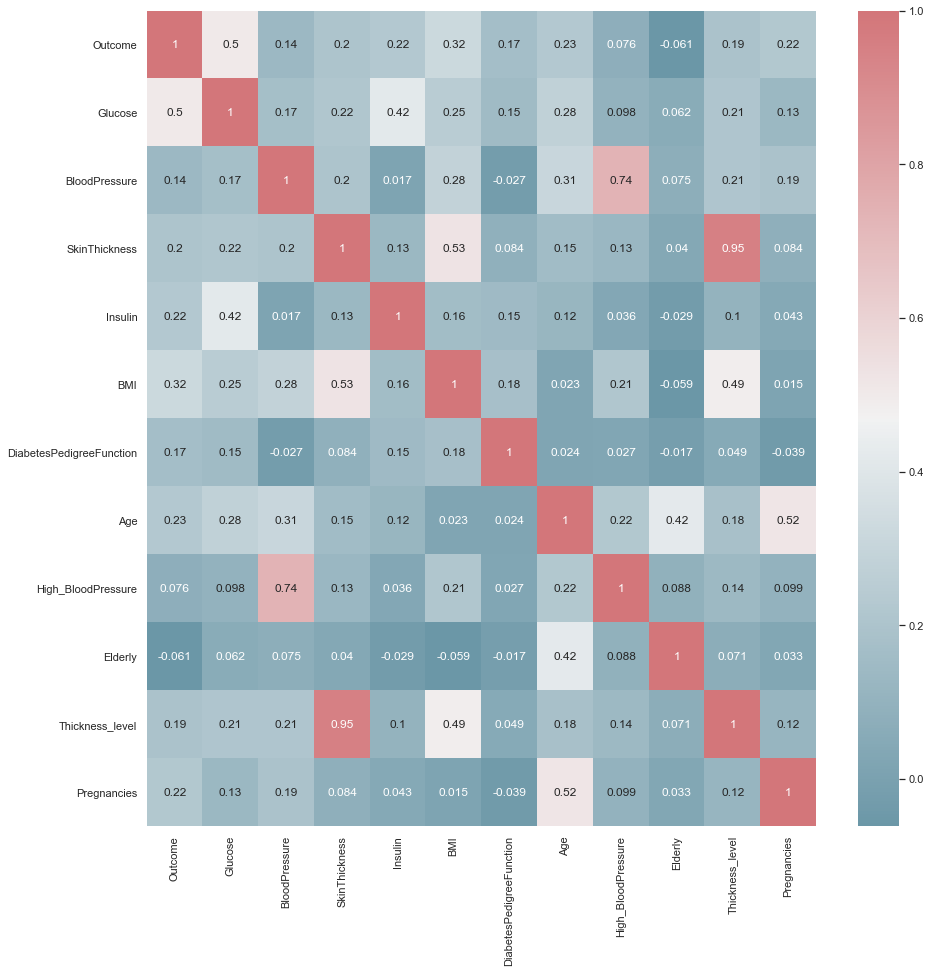

In [40]:
cmap = sns.diverging_palette(220, 10, 50, 60, as_cmap=True)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df[['Outcome', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',
       'High_BloodPressure', 'Weight', 'Elderly', 'Glucose_Level',
       'Thickness_level','Pregnancies']].corr(),annot=True, cmap=cmap)
sns.set(font_scale=1)

In [41]:
dfDummies = pd.get_dummies(df)
dfDummies

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,High_BloodPressure,Elderly,Thickness_level,Weight_Healthy,Weight_Obese,Weight_UnderWeight,Glucose_Level_high_glucose_levels,Glucose_Level_low_glucose_levels,Glucose_Level_normal_glucose_levels
118,4,97,60,23,125.0,28.2,0.443,22,0,0,0,3,1,0,0,0,0,1
336,0,117,72,32,125.0,33.8,0.932,44,0,0,0,4,0,1,0,0,0,1
374,2,122,52,43,158.0,36.2,0.816,28,0,0,0,5,0,1,0,0,0,1
518,13,76,60,32,125.0,32.8,0.180,41,0,0,0,4,0,1,0,0,0,1
716,3,173,78,39,185.0,33.8,0.970,31,1,0,0,4,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,3,182,74,32,125.0,30.5,0.345,29,1,0,0,4,0,1,0,1,0,0
143,10,108,66,32,125.0,32.4,0.272,42,1,0,0,4,0,1,0,0,0,1
474,4,114,64,32,125.0,28.9,0.126,24,0,0,0,4,1,0,0,0,0,1
318,3,115,66,39,140.0,38.1,0.150,28,0,0,0,4,0,1,0,0,0,1


In [42]:
corr_matrix = dfDummies.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                                1.000000
Glucose                                0.502774
Glucose_Level_high_glucose_levels      0.411980
BMI                                    0.320748
Weight_Obese                           0.283278
Age                                    0.227728
Insulin                                0.224760
Pregnancies                            0.223305
SkinThickness                          0.203656
Thickness_level                        0.193124
DiabetesPedigreeFunction               0.168753
BloodPressure                          0.136409
High_BloodPressure                     0.076403
Weight_UnderWeight                    -0.059869
Elderly                               -0.061402
Glucose_Level_low_glucose_levels      -0.095130
Weight_Healthy                        -0.274294
Glucose_Level_normal_glucose_levels   -0.382554
Name: Outcome, dtype: float64

Text(0.5, 1.0, 'Diabetes Patient')

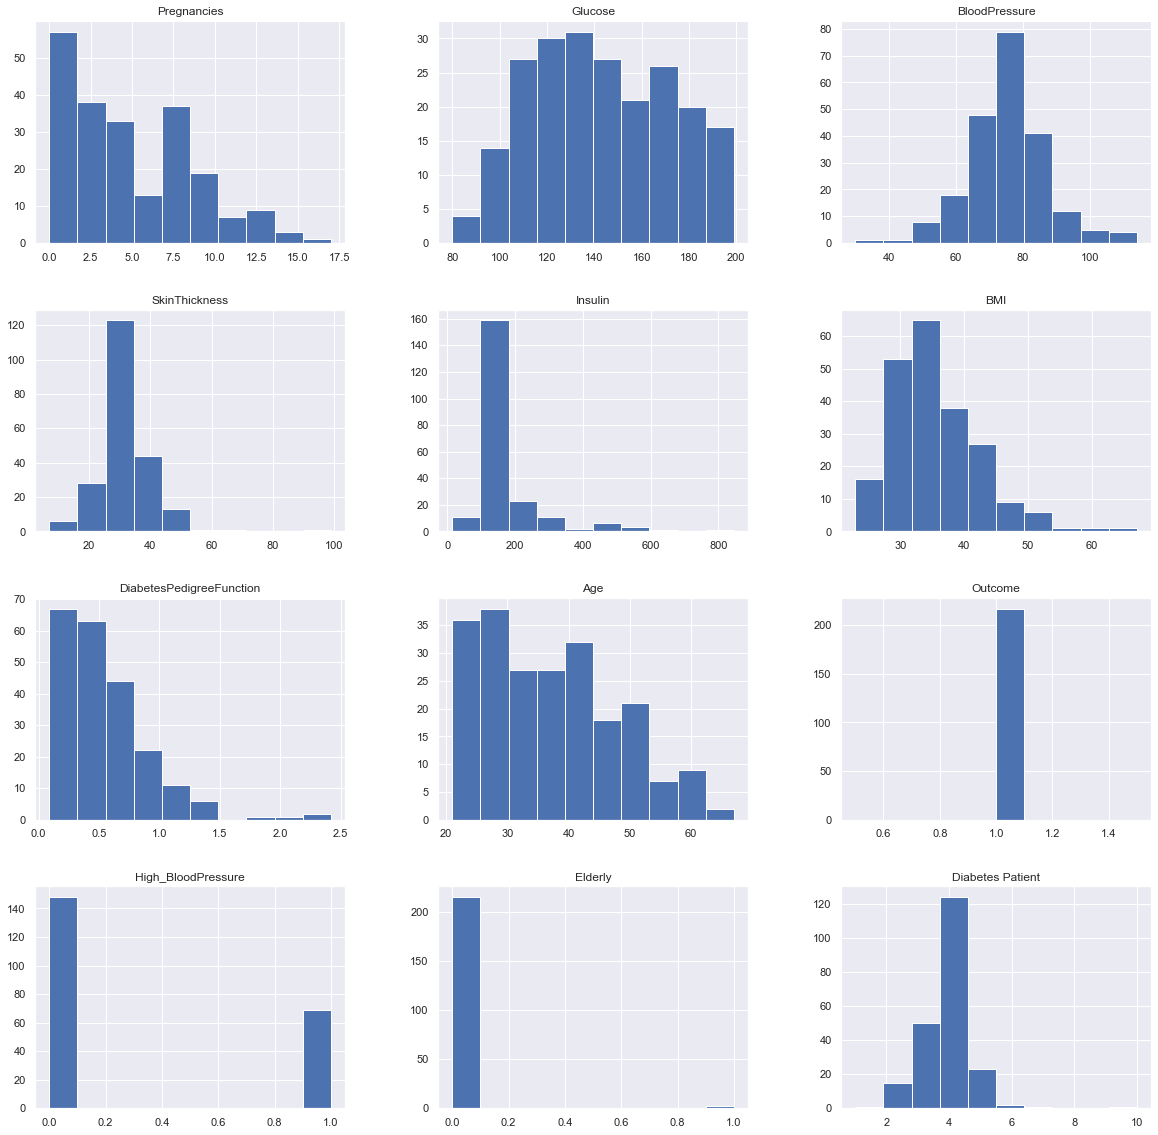

In [43]:
p = df[df['Outcome']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')

In [44]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'High_BloodPressure', 'Weight', 'Elderly', 'Glucose_Level',
       'Thickness_level'],
      dtype='object')

In [45]:
numerical=df.drop(['Outcome','Weight', 'Glucose_Level','Thickness_level'], axis = 1)
numerical

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,High_BloodPressure,Elderly
118,4,97,60,23,125.0,28.2,0.443,22,0,0
336,0,117,72,32,125.0,33.8,0.932,44,0,0
374,2,122,52,43,158.0,36.2,0.816,28,0,0
518,13,76,60,32,125.0,32.8,0.180,41,0,0
716,3,173,78,39,185.0,33.8,0.970,31,0,0
...,...,...,...,...,...,...,...,...,...,...
317,3,182,74,32,125.0,30.5,0.345,29,0,0
143,10,108,66,32,125.0,32.4,0.272,42,0,0
474,4,114,64,32,125.0,28.9,0.126,24,0,0
318,3,115,66,39,140.0,38.1,0.150,28,0,0


In [46]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'High_BloodPressure', 'Weight', 'Elderly', 'Glucose_Level',
       'Thickness_level'],
      dtype='object')

In [47]:
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',
       'High_BloodPressure',
       'Thickness_level']


In [48]:
df_n = pd.get_dummies(df2.drop(['Elderly'], axis=1))

X = df_n.drop(['Outcome'], axis=1)
y = df_n['Outcome'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

X_train


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,High_BloodPressure,Thickness_level,Weight_Healthy,Weight_Obese,Weight_UnderWeight,Glucose_Level_high_glucose_levels,Glucose_Level_low_glucose_levels,Glucose_Level_normal_glucose_levels
118,4,97,60,23,125.0,28.2,0.443,22,0,3,1,0,0,0,0,1
336,0,117,72,32,125.0,33.8,0.932,44,0,4,0,1,0,0,0,1
374,2,122,52,43,158.0,36.2,0.816,28,0,5,0,1,0,0,0,1
518,13,76,60,32,125.0,32.8,0.180,41,0,4,0,1,0,0,0,1
716,3,173,78,39,185.0,33.8,0.970,31,0,4,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,3,182,74,32,125.0,30.5,0.345,29,0,4,0,1,0,1,0,0
143,10,108,66,32,125.0,32.4,0.272,42,0,4,0,1,0,0,0,1
474,4,114,64,32,125.0,28.9,0.126,24,0,4,1,0,0,0,0,1
318,3,115,66,39,140.0,38.1,0.150,28,0,4,0,1,0,0,0,1


In [49]:
standard = StandardScaler()

X_test_stand = X_test.copy()
X_train_stand = X_train.copy()
y_train_stand = y_train.copy()
y_test_stand = y_test.copy()


X_train_stand[numerical_columns] = standard.fit_transform(X_train_stand[numerical_columns])
X_test_stand[numerical_columns] = standard.transform(X_test_stand[numerical_columns])


In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_stand,y_train, test_size=0.2, random_state=25)

In [51]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
tt = {}
il = []
ac=[]
for  i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train2,y_train2)
    y_pred = knn.predict(X_test2)
    il.append(i)
    ac.append( sklearn.metrics.roc_auc_score(y_test2,y_pred) )
    tt.update({'K':il})
    tt.update({'ROC_ACC':ac})
vv = pd.DataFrame(tt)
vv.sort_values('ROC_ACC',ascending=False,inplace=True,ignore_index=True)
vv.head(10)

,K,ROC_ACC
0,97,0.659452
1,95,0.659452
2,96,0.656301
3,3,0.650959
4,99,0.649452
5,89,0.649452
6,98,0.649452
7,73,0.649452
8,63,0.642603
9,65,0.642603


In [52]:
k = []
ind=[]

for  i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train2,y_train2,cv=10,scoring='accuracy')
    k.append(score.mean())
    ind.append(i)
d = {'score': k, 'k': ind}
dfd = pd.DataFrame(data=d)


In [53]:
dfd['score'].sort_values(ascending=False)

40    0.780041
44    0.778000
42    0.778000
46    0.777959
50    0.777959
        ...   
4     0.743306
3     0.735102
2     0.731143
1     0.728980
0     0.692449
Name: score, Length: 99, dtype: float64

In [54]:
dfd.iloc[28]

score     0.765837
k        29.000000
Name: 28, dtype: float64